# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [1]:
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

## Inspect Data

In [2]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [3]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [4]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [17]:
# TODO implement a new column text which contains the lowercased title and lead
df["text"] = (df["title"] + " " + df["lead"]).apply(lambda str : str.lower())
df.head()

,label,title,lead,text
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bears claw back into the black (reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace (reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks' outlook (reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","oil prices soar to all-time record, posing new..."


In [39]:
# TODO print the number of documents for each label
df["label"].value_counts()

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

Text(0, 0.5, 'Average Document Length')

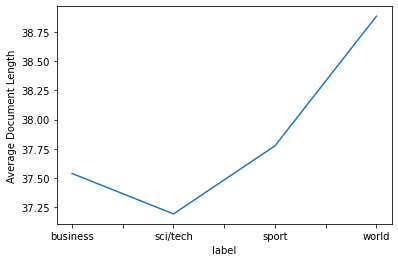

In [51]:
# TODO create a new column with the number of words for each text
df["n_words"] = df['text'].apply(lambda text : len(text.split()))

# TODO plot the average number of words per label
import matplotlib.pyplot as plt
ax = df.groupby(['label'])['n_words'].mean().plot()
ax.set_ylabel('Average Document Length')


## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") appear in the different classes in our data

In [56]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern
    x = f" {keyword} " # whitespace to consider only isolate 
    pattern = re.compile(x)
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(pattern.findall(x))
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print(df["text"].apply(count_keyword_frequencies).sum())
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword)
        #TODO print how often the keyword appears in this class
        print(df[df["label"]==label]["text"].apply(count_keyword_frequencies).sum())
    print ("*" * 100)

1558
label: business , keyword: play
64
label: sci/tech , keyword: play
190
label: sport , keyword: play
1227
label: world , keyword: play
77
****************************************************************************************************
986
label: business , keyword: tax
793
label: sci/tech , keyword: tax
46
label: sport , keyword: tax
8
label: world , keyword: tax
139
****************************************************************************************************
190
label: business , keyword: blackberry
35
label: sci/tech , keyword: blackberry
155
label: sport , keyword: blackberry
0
label: world , keyword: blackberry
0
****************************************************************************************************
845
label: business , keyword: israel
11
label: sci/tech , keyword: israel
17
label: sport , keyword: israel
28
label: world , keyword: israel
789
****************************************************************************************************


As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

Text(0, 0.5, "Wordcount of 'tax'")

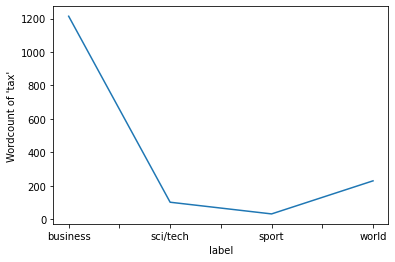

In [65]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(keyword)

def count_keyword_frequencies(x):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text
    num_occurrences = len(pattern.findall(x))
    return num_occurrences

df["counts"] = df["text"].apply(count_keyword_frequencies)
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
ax = df.groupby(["label"])["counts"].sum().plot()
ax.set_ylabel("Wordcount of 'tax'")


In [6]:
import os

os.system('jupyter nbconvert --to html homework_01.ipynb')

[NbConvertApp] Converting notebook homework_01.ipynb to html
[NbConvertApp] Writing 594565 bytes to homework_01.html


0

In [8]:
!open homework_01.html